## Querying Data

Midas supports dataframes with syntax using that of the [data science module](http://data8.org/datascience/) from Data 8. The following list a quick guide, and in the cells below we have more concrete examples:

* SELECT: `df.select(['col_name', 'more_col_name'])`---note that columns are referenced as strings. Note that you can also access the columns as numpy arrays by using `df['col_name']`, which can be handy to use methods like `np.average(df['col_name'])`.
* WHERE: `df.where('col_name', predicate)` -- the predicates are using lambda functions provided in the [`are`](http://data8.org/datascience/predicates.html) library.
* GROUP: `df.group('col_name', agg_fun)`, the default aggregation for a `group` is count, but you can also supply the aggregation by using existing aggregation functions such as Python's built in `sum`, `min`, `max` (or any of the `numpy` aggregation methods that work on arrays). The groupby operation is applied to all the columns that are not being grouped by on.
* Apply general methods: `df.apply(map_fun, new_column_name)`---note that this is _not_ row level, you have to specify the columns you need.

The following are useful for data modification:
* `df['label']= values` defines the value of a (new) column, note that values must be a numpy array.
* `drop` is useful for dropping a column, for instance, one that you just created.
* `sort` is useful for sorting

Below is a list if you want to look up more functions, http://data8.org/sp20/python-reference.html, but for the sake of the user study, we recommend that you stick to the common functionalities.

In [1]:
# we have imported the relevant functions here
from datascience import Table, are
from datascience.util import make_array 

In [2]:
# a toy dataframe for you to understand
t = Table().with_columns(
    'letter', make_array('a', 'b', 'c', 'a', 'b'),
    'count',  make_array(9, 3, 3, 1, 2),
    'points', make_array(1, 2, 2, 10, 1),
    'time',  make_array('2019-07-01T00:00:00.000', '2019-07-10T00:00:00.000', '2019-07-21T00:00:00.000', '2019-05-01T00:00:00.000', '2019-07-02T00:00:00.000')
)

## Select

In [3]:
t.select(['letter'])

letter
a
b
c
a
b


In [4]:
# you can also use the column series with numpy functions directly
import numpy as np
np.unique(t['letter'])

array(['a', 'b', 'c'], dtype='<U1')

In [5]:
# you can also access rows
t.row(0)

Row(letter='a', count=9, points=1, time='2019-07-01T00:00:00.000')

In [6]:
t.row(0).letter

'a'

## Where

In [7]:
t.where('letter', 'a')

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000
a,1,10,2019-05-01T00:00:00.000


In [8]:
# note different from pandas, like `df[df['a']>8]`
t.where('count', are.above(4))

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000


In [9]:
# compare two columns
t.where("count", are.above, "points")

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000
b,3,2,2019-07-10T00:00:00.000
c,3,2,2019-07-21T00:00:00.000
b,2,1,2019-07-02T00:00:00.000


In [10]:
from datetime import datetime

fun = lambda e: datetime.strptime(e, "%Y-%m-%dT%H:%M:%S.%f") > datetime.strptime("2019-07-15T00:00:00.000", "%Y-%m-%dT%H:%M:%S.%f")
t.where('time', fun)

letter,count,points,time
c,3,2,2019-07-21T00:00:00.000


## Group

In [11]:
# the default performs a count
t.group('letter')

letter,count
a,2
b,2
c,1


In [12]:
t.group('letter', sum)

letter,count sum,points sum,time sum
a,10,11,
b,5,3,
c,3,2,


In [13]:
t.select(['letter', 'points']).group('letter', sum)

letter,points sum
a,11
b,3
c,2


## Apply

In [14]:
# apply function to all rows in a column
t.apply(lambda x: x - 1, 'points')

array([0, 1, 1, 9, 0])

In [15]:
# apply function for two columns
t.apply(lambda x, y: x * y, 'count', 'points')

array([ 9,  6,  6, 10,  2])

In [16]:
t.apply(lambda row: row.points * 2)

array([ 2,  4,  4, 20,  2])

In [17]:
t.apply(lambda row: print(row[0]))

a
b
c
a
b


array([None, None, None, None, None], dtype=object)

## Basic Statistics

In [18]:
t.stats()

statistic,letter,count,points,time
min,a,1,1,2019-05-01T00:00:00.000
max,c,9,10,2019-07-21T00:00:00.000
median,,3,2,
sum,,18,16,


In [19]:
# count row
len(t.rows)

5

In [20]:
# count columsn
len(t.columns)

4

## Append Column or Rows

In [21]:
t.append(('a', 10, 3, '2019-07-10T00:00:00.000'))

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000
b,3,2,2019-07-10T00:00:00.000
c,3,2,2019-07-21T00:00:00.000
a,1,10,2019-05-01T00:00:00.000
b,2,1,2019-07-02T00:00:00.000
a,10,3,2019-07-10T00:00:00.000


In [22]:
t['less_points'] = t.apply(lambda x: x - 1, 'points')
t

letter,count,points,time,less_points
a,9,1,2019-07-01T00:00:00.000,0
b,3,2,2019-07-10T00:00:00.000,1
c,3,2,2019-07-21T00:00:00.000,1
a,1,10,2019-05-01T00:00:00.000,9
b,2,1,2019-07-02T00:00:00.000,0
a,10,3,2019-07-10T00:00:00.000,2


In [23]:
# then you can remove it
t = t.drop('less_points')
t

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000
b,3,2,2019-07-10T00:00:00.000
c,3,2,2019-07-21T00:00:00.000
a,1,10,2019-05-01T00:00:00.000
b,2,1,2019-07-02T00:00:00.000
a,10,3,2019-07-10T00:00:00.000


## Sorting

In [24]:
t.sort('points')

letter,count,points,time
a,9,1,2019-07-01T00:00:00.000
b,2,1,2019-07-02T00:00:00.000
b,3,2,2019-07-10T00:00:00.000
c,3,2,2019-07-21T00:00:00.000
a,10,3,2019-07-10T00:00:00.000
a,1,10,2019-05-01T00:00:00.000


In [25]:
t.sort('points', descending = True)

letter,count,points,time
a,1,10,2019-05-01T00:00:00.000
a,10,3,2019-07-10T00:00:00.000
c,3,2,2019-07-21T00:00:00.000
b,3,2,2019-07-10T00:00:00.000
b,2,1,2019-07-02T00:00:00.000
a,9,1,2019-07-01T00:00:00.000


## Basic Visualizations

In [26]:
test_df = Table().with_columns(
         'days',  make_array(0, 1, 2, 3, 4, 5),
         'price', make_array(90.5, 90.00, 83.00, 95.50, 82.00, 82.00),
         'projection', make_array(90.75, 82.00, 82.50, 82.50, 83.00, 82.50))

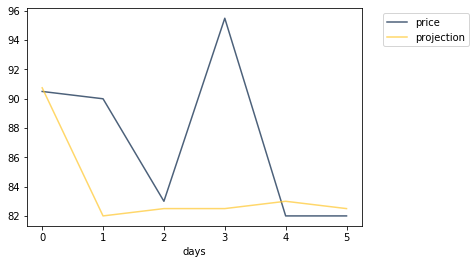

In [27]:
%matplotlib inline
# line charts 
test_df.plot('days') 

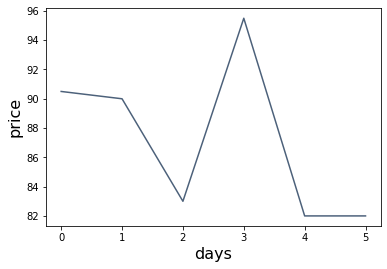

In [28]:
# line charts 
test_df.plot('days', 'price') 

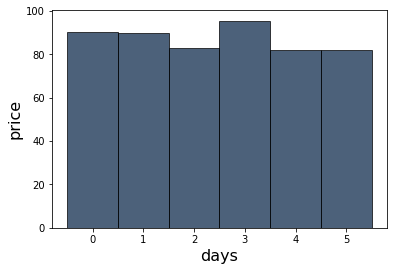

In [29]:
test_df.bar('days', 'price')

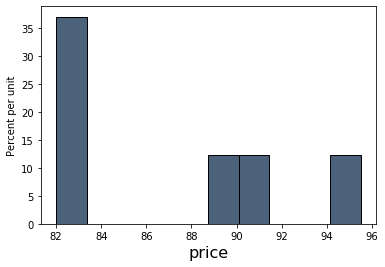

In [30]:
test_df.hist('price')

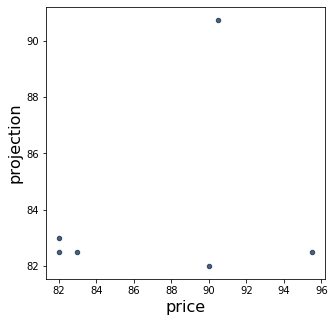

In [31]:
test_df.scatter('price', 'projection')

## You can also use Pandas' plotting utilities

You are also welcome to use other plotting libraries that you are familiar with already.

Note that <font color="red"> for the sake of our experiment, please use datascience module for your querying needs</font>, and limit pandas to plotting purposes only.

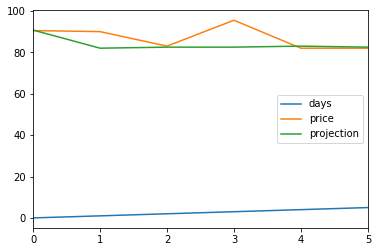

In [32]:
test_df_pd = test_df.to_df()
test_df_pd.plot()